In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\팀프로젝트\\1차(2조_데이터뿌시기)\\헬스케어데이터.csv')

In [33]:
df.shape, df.columns

((13178345, 19),
 Index(['기준년도', '가입자 일련번호', '진료내역일련번호', '성별코드', '연령대코드', '시도코드', '요양개시일자',
        '서식코드', '진료과목코드', '주상병코드', '부상병코드', '요양일수', '입내원일수', '심결가산율',
        '심결요양급여비용총액', '심결본인부담금', '심결보험자부담금', '총처방일수', '데이터 기준일자'],
       dtype='object'))

In [34]:
df.dtypes

기준년도            int64
가입자 일련번호        int64
진료내역일련번호        int64
성별코드            int64
연령대코드           int64
시도코드            int64
요양개시일자          int64
서식코드            int64
진료과목코드          int64
주상병코드          object
부상병코드          object
요양일수            int64
입내원일수           int64
심결가산율         float64
심결요양급여비용총액      int64
심결본인부담금         int64
심결보험자부담금        int64
총처방일수           int64
데이터 기준일자        int64
dtype: object

In [35]:
df.head(5)

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1,1,0.25,145680,72800,72880,0,20201222
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1,1,0.25,13240,6600,6640,3,20201222
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7,21,0.25,861590,205810,655780,0,20201222
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1,1,0.15,48440,14500,33940,3,20201222


In [36]:
df_train = df.iloc[:, 3:-1]
df_train.head()

,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,2,12,46,20191104,3,5,M751,M750,1,1,0.25,19240,9600,9640,0
1,2,12,46,20190806,3,1,E1164,N308,1,1,0.25,145680,72800,72880,0
2,2,12,46,20190920,3,1,N308,E1164,1,1,0.25,13240,6600,6640,3
3,2,12,46,20190807,2,1,E1164,N308,7,21,0.25,861590,205810,655780,0
4,2,12,46,20190318,3,13,H6531,J303,1,1,0.15,48440,14500,33940,3


In [37]:
df_train[['요양일수', '입내원일수', '심결가산율', '심결요양급여비용총액', '총처방일수']].corr()
# 상관성 있는 변수들 
# 입내원일수와 요양일수 / 요양일수와 심결요양급여비용총액 / 처방일수와 심결가산율 / 입내원일수와 심결요양급여비용총액

,요양일수,입내원일수,심결가산율,심결요양급여비용총액,총처방일수
요양일수,1.000000,0.438760,0.095766,0.572821,-0.045175
입내원일수,0.438760,1.000000,0.123523,0.324473,-0.064066
심결가산율,0.095766,0.123523,1.000000,0.147696,0.252984
심결요양급여비용총액,0.572821,0.324473,0.147696,1.000000,-0.035940
총처방일수,-0.045175,-0.064066,0.252984,-0.035940,1.000000


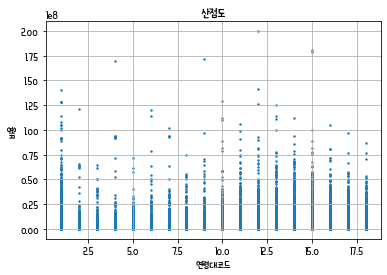

In [38]:
plt.scatter(df_train['연령대코드'], df_train['심결요양급여비용총액'], s = 2)
plt.title('산점도')
plt.xlabel('연령대코드')
plt.ylabel('비용')
plt.grid(True)
plt.show()

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


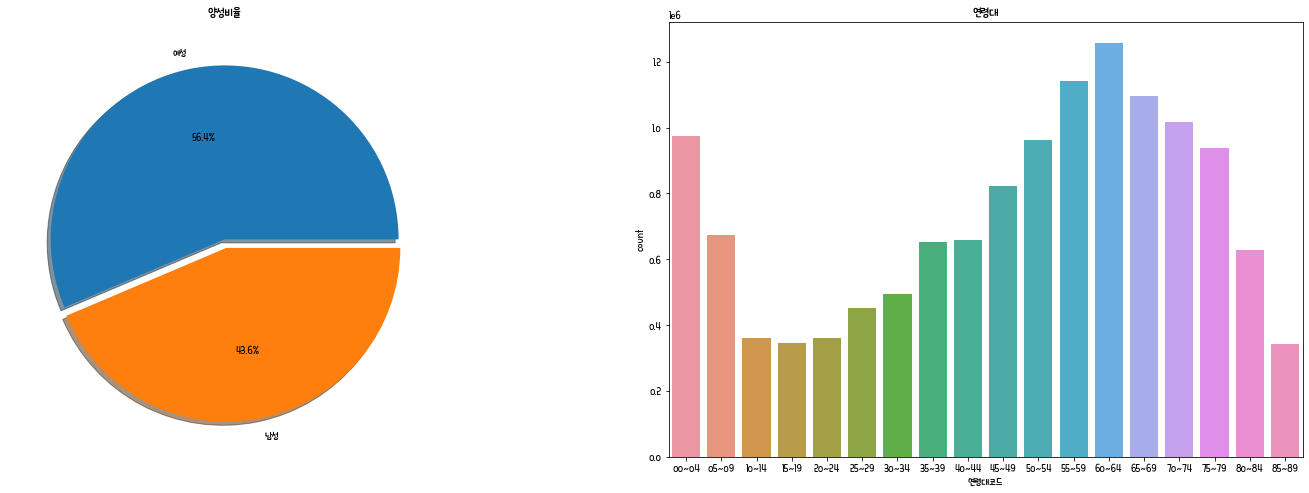

In [85]:
df_train = df.iloc[:, 3:-1]
age_code_list = ['00~04', '05~09', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', 
                 '65~69', '70~74', '75~79', '80~84', '85~89']
age_code_dict = dict(zip([i for i in range(1, 19)], age_code_list))
print(set(df_train['연령대코드'].values))

df_train['성별코드'] = df_train['성별코드'].apply(lambda x: '남성' if x == 1 else '여성')
df_train['연령대코드'] = df_train['연령대코드'].apply(lambda x: age_code_dict[x])
df_train = df_train.sort_values(by = '연령대코드')
f, ax = plt.subplots(1, 2, figsize=(25, 8))

df_train['성별코드'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('양성비율')
ax[0].set_ylabel('')
sns.countplot('연령대코드', data=df_train, ax=ax[1])
ax[1].set_title('연령대')

plt.show()

In [180]:
adm_file = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\팀프로젝트\\1차(2조_데이터뿌시기)\\sido.txt', sep = '|')
adm_file.columns = ['시도코드', '시도명'] # 칼럼명에서 공백제거
import re
adm_file['시도명'] = adm_file['시도명'].apply(lambda x: re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', x))
adm_dict = dict(zip(adm_file['시도코드'], adm_file['시도명'])) 
adm_dict

{11: '서울시',
 26: '부산시',
 27: '대구시',
 28: '인천시',
 29: '광주시',
 30: '대전시',
 31: '울산시',
 36: '세종시',
 41: '경기도',
 42: '강원도',
 43: '충청북도',
 44: '충청남도',
 45: '전라북도',
 46: '전라남도',
 47: '경상북도',
 48: '경상남도',
 49: '제주도'}

In [203]:
df_train = df.iloc[:, 3:-1]
print(sorted(list(set(df_train['시도코드']))))
df_train['시도코드'] = df_train['시도코드'].apply(lambda x: adm_dict[x])
df_train['시도코드'].value_counts()

[11, 26, 27, 28, 29, 30, 31, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49]


경기도     3201520
서울시     2369736
부산시      904748
경상남도     864075
인천시      719618
경상북도     708023
대구시      627035
충청남도     590450
전라남도     557498
전라북도     546698
충청북도     438137
대전시      391779
강원도      364394
광주시      349291
울산시      277661
제주도      179255
세종시       88427
Name: 시도코드, dtype: int64

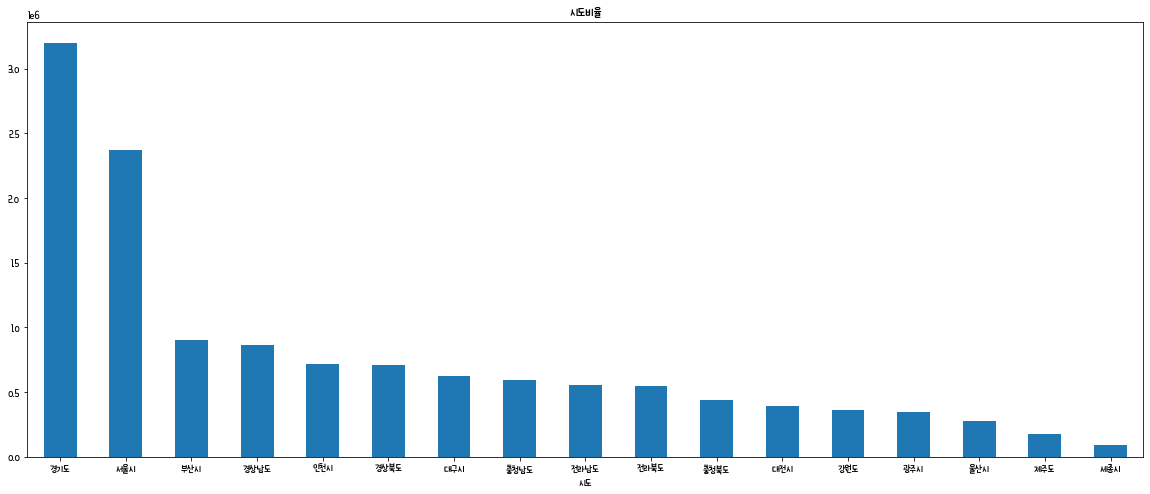

In [198]:
plt.figure(figsize = (20, 8))
df_train['시도코드'].value_counts().plot.bar(rot=0)
plt.title("시도비율")
plt.xlabel("시도")
plt.ylim()
plt.show()

In [220]:
# https://neurowhai.tistory.com/350(대한민국 시도 json파일)
import json
with open('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\팀프로젝트\\1차(2조_데이터뿌시기)\\TL_SCCO_CTPRVN.json', encoding = 'UTF-8') as json_file:
    geo_data = json.load(json_file)
# geo_data['features'][:]
len(geo_data['features'])

17

In [231]:
sido_list = [] 
for i in range(len(geo_data['features'])):
    sido_list.append(geo_data['features'][i]['properties']['CTP_KOR_NM']) # 헬스케어 데이터의 시도명과 불일치..... 수정필요(geo_data와 일치화)
sido_list = sorted(sido_list)
sido_list

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [285]:
pop_2019 = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\팀프로젝트\\1차(2조_데이터뿌시기)\\시도별_주민등록_인구현황_20210928135141.csv', encoding = 'euc-kr')
pop_2019 = pop_2019.iloc[:, 0:2] # 필요데이터만 슬라이싱
pop_2019.columns = ['시도명', '총인구']
pop_2019 = pop_2019.drop([0, 1])
pop_2019 = pop_2019.sort_values(by = '시도명')
pop_2019 = pop_2019.reset_index()
pop_2019.drop(['index'], axis = 1, inplace = True)
pop_2019['시도명'] = sido_list
pop_2019['총인구'] = pop_2019['총인구'].apply(lambda x: int(x)) 

In [287]:
df_sido = pd.DataFrame(df_train['시도코드'].value_counts())
df_sido.reset_index(inplace = True)
df_sido.columns = ['시도명', '빈도수']
df_sido = df_sido.sort_values(by = '시도명')
df_sido = df_sido.reset_index()
df_sido.drop(['index'], axis = 1, inplace = True)
df_sido['시도명'] = sido_list
df_sido['시도별 인구'] = pop_2019['총인구']
df_sido['빈도비율'] = df_sido['빈도수'] / df_sido['시도별 인구']
df_sido

,시도명,빈도수,시도별 인구,빈도비율
0,강원도,364394,1560571,0.233500
1,경기도,3201520,13653984,0.234475
2,경상남도,864075,3438676,0.251281
3,경상북도,708023,2723955,0.259925
4,광주광역시,349291,1480293,0.235961
5,대구광역시,627035,2468222,0.254043
6,대전광역시,391779,1493979,0.262239
7,부산광역시,904748,3466563,0.260993
8,서울특별시,2369736,10010983,0.236714
9,세종특별자치시,88427,346275,0.255366


In [289]:
import folium
center = [35.541, 127.5]
map = folium.Map(location = center, zoom_start = 7)
folium.TileLayer('cartodbpositron').add_to(map)
folium.Choropleth(
    geo_data = geo_data,              # 기존 데이터 파일 경로(인코딩 주의)
    data = df_sido,                        # 시각화하고자하는 데이터프레임
    columns = ('시도명', '빈도수'), # 지도 데이터와 매핑할 값, 시각화하고자하는 변수
    key_on = 'feature.properties.CTP_KOR_NM', # 데이터 파일과 매핑할 값
    fill_color = 'BuPu',              # Color Map
    lengend_name = '지역기준표'       # Color 범주 이름
).add_to(map)
title = '<h3 align = "center" style = "font-size : 20px"> 지역기준표</h3>'    
map.get_root().html.add_child(folium.Element(title))
map

In [288]:
import folium
center = [35.541, 127.5]
map = folium.Map(location = center, zoom_start = 7)
folium.TileLayer('cartodbpositron').add_to(map)
folium.Choropleth(
    geo_data = geo_data,              # 기존 데이터 파일 경로(인코딩 주의)
    data = df_sido,                        # 시각화하고자하는 데이터프레임
    columns = ('시도명', '빈도비율'), # 지도 데이터와 매핑할 값, 시각화하고자하는 변수
    key_on = 'feature.properties.CTP_KOR_NM', # 데이터 파일과 매핑할 값
    fill_color = 'BuPu',              # Color Map
    lengend_name = '지역기준표'       # Color 범주 이름
).add_to(map)
title = '<h3 align = "center" style = "font-size : 20px"> 지역기준표</h3>'    
map.get_root().html.add_child(folium.Element(title))
map

In [ ]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()